<a href="https://colab.research.google.com/github/Dayn9/LearnTensorFlow/blob/master/CustomTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.enable_eager_execution()

In [3]:
x = tf.zeros([10, 10]) + 2
print(x)


tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [4]:
v = tf.Variable(1.0)
print(v)
v.assign(3.0)
print(v)
v.assign(tf.square(v))

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=9.0>

In [0]:
# Perceptron
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0) #Weight
    self.b = tf.Variable(0.0) #Bias
  def __call__(self, x):
    return self.W * x + self.b

In [6]:
model = Model()
print(model(3))


Instructions for updating:
Colocations handled automatically by placer.
tf.Tensor(15.0, shape=(), dtype=float32)


In [0]:
# Loss Function
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape = [NUM_EXAMPLES])
noise = tf.random_normal(shape = [NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

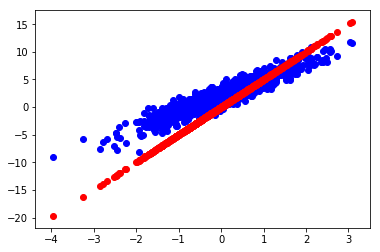

In [9]:
plt.scatter(inputs, outputs, c = 'b')
plt.scatter(inputs, model(inputs), c = 'r')
plt.show()

In [10]:
print('Current Loss: ')
print(loss(model(inputs), outputs).numpy())

Current Loss: 
9.058121


In [0]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
      current_loss = loss(model(inputs), outputs) # compute the loss (mean sqr error)
    dW, db = t.gradient(current_loss, [model.W, model.b]) #use gradient tape to backpropegate
    model.W.assign_sub(learning_rate * dW) # reasign based on loss and learning rate
    model.b.assign_sub(learning_rate * db)

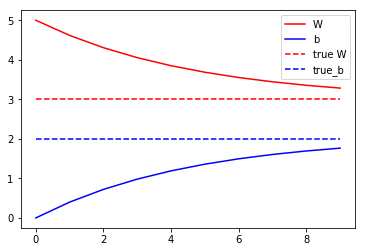

In [17]:
Ws, bs = [], [] # create empty arrays
model = Model()

epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)
  
  train(model, inputs, outputs, learning_rate = 0.1)

# Plot out the training data
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()


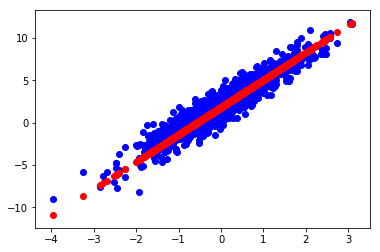

In [18]:
plt.scatter(inputs, outputs, c = 'b')
plt.scatter(inputs, model(inputs), c = 'r')
plt.show()